# EDA

In [5]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.figure_factory as ff

# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg"

In [2]:
# Import dataset
print("Loading dataset...")
dataset = pd.read_csv("src/Data.csv")
print("...Done.")
print()

Loading dataset...
...Done.



In [3]:
# Basic stats
print(f"Number of rows: {dataset.shape[0]}, Number of columns: {dataset.shape[1]}")
print(dataset.shape)

# Affichage du dataset
print("Display of dataset: ")
display(dataset.head())
print()

# Statistiques de base
print("Basic statistics: ")
data_desc = dataset.describe(include="all")
display(data_desc)
print()

# Pourcentage des valeurs manquantes
print("Percentage of missing values: ")
missing_values = 100 * dataset.isnull().sum() / dataset.shape[0]
display(missing_values)

Number of rows: 10, Number of columns: 4
(10, 4)
Display of dataset: 


,Country,Age,Salary,Purchased
0,France,44.0,72000,No
1,Spain,27.0,48000,Yes
2,Germany,30.0,54000,No
3,Spain,38.0,61000,No
4,Germany,40.0,69000,Yes



Basic statistics: 


,Country,Age,Salary,Purchased
count,10,9.000000,10.000000,10
unique,3,NaN,NaN,2
top,France,NaN,NaN,No
freq,4,NaN,NaN,5
mean,NaN,38.777778,64300.000000,NaN
std,NaN,7.693793,11681.419244,NaN
min,NaN,27.000000,48000.000000,NaN
25%,NaN,35.000000,55000.000000,NaN
50%,NaN,38.000000,64000.000000,NaN
75%,NaN,44.000000,71250.000000,NaN



Percentage of missing values: 


Country       0.0
Age          10.0
Salary        0.0
Purchased     0.0
dtype: float64

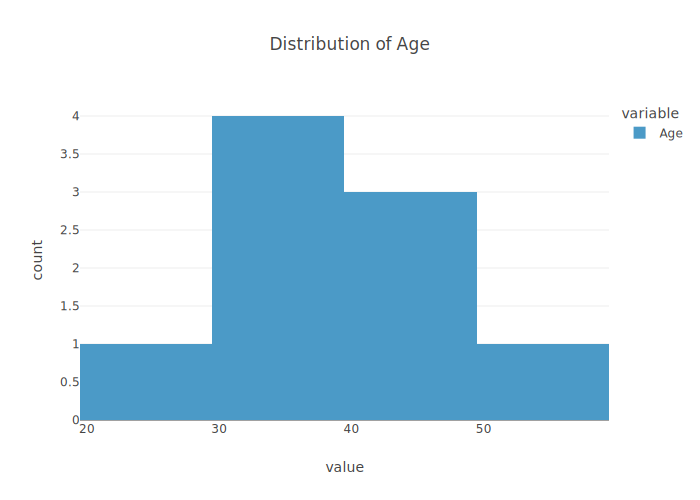

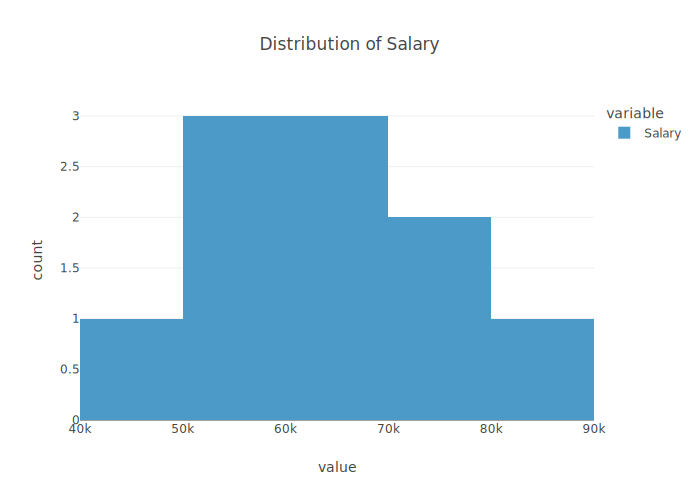

In [4]:
# Univariate analysis: Distribution of each numeric variable
num_features = ['Age', 'Salary']
for feature in num_features:
    fig = px.histogram(dataset[feature], title=f'Distribution of {feature}')
    fig.show()

In [ ]:
# Univariate analysis: Barplot of each qualitative variable
cat_features = ['Country', 'Purchased']
for feature in cat_features:
    fig = px.bar(dataset, x=feature, title=f'Distribution of {feature}')
    fig.show()

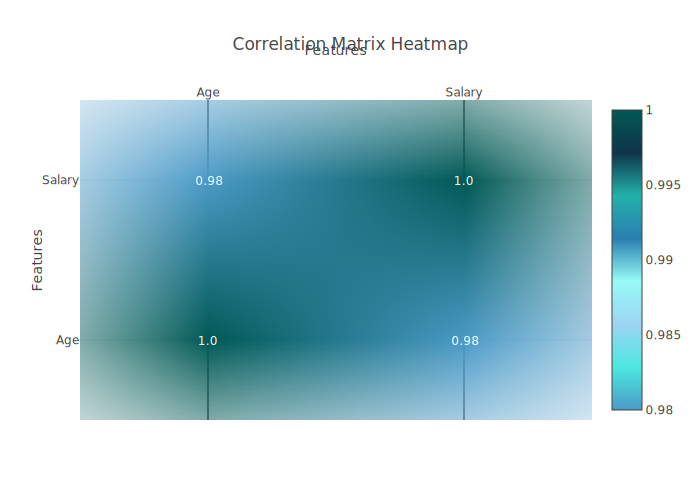

In [7]:
# Utiliser la liste num_features pour calculer la matrice de corrélation
corr_matrix = dataset[num_features].corr().round(2)

# Créer une heatmap annotée avec la palette de couleurs Jedha
fig = ff.create_annotated_heatmap(z=corr_matrix.values, 
                                  x=corr_matrix.columns.tolist(), 
                                  y=corr_matrix.index.tolist(),
                                  colorscale=pio.templates["jedha"].layout.colorway,  # Utilisation de la palette Jedha
                                  showscale=True) # Ajouter une légende de couleur à côté de la heatmap

# Affichage du graphique
fig.update_layout(title='Correlation Matrix Heatmap',
                  xaxis_title='Features',
                  yaxis_title='Features')

fig.show()

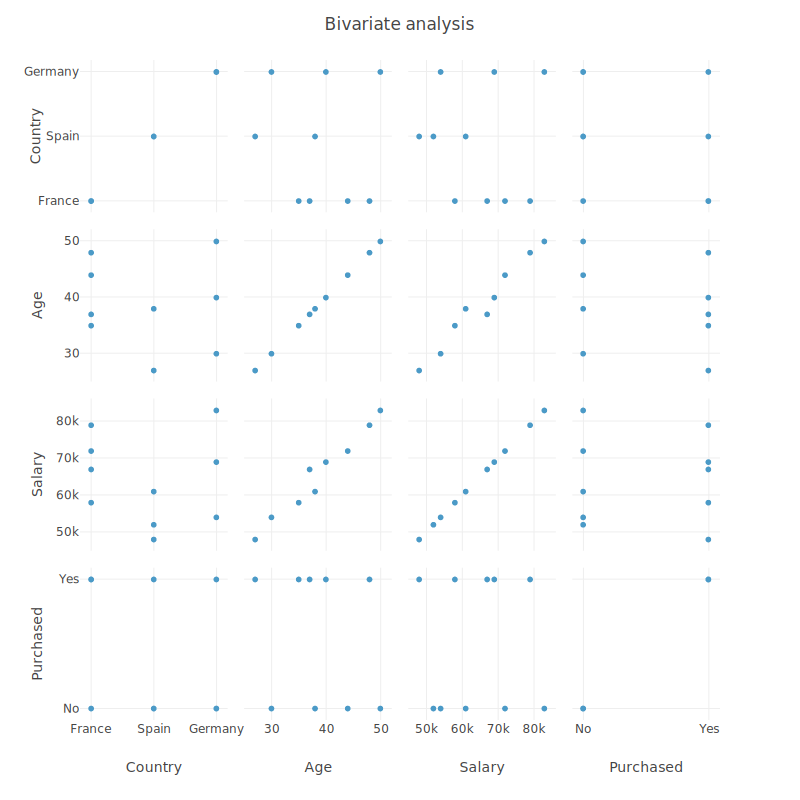

In [8]:
# Visualisation des dépendances par paires (Bivariate analysis)
fig = px.scatter_matrix(dataset)

# Mise à jour de la mise en page avec go.layout.Title pour suivre la palette Jedha
fig.update_layout(
    title=go.layout.Title(text="Bivariate analysis", x=0.5),  # Utilisation de go.layout.Title pour le titre
    showlegend=False,  # Masquer la légende
    autosize=False,
    height=800, width=800
)

# Affichage du graphique
fig.show()

# Baseline model : simple linear regression

In [10]:
# Séparation de la variable cible Y des features X
print("Séparation des labels des features...")

features_list = ["Age"]
target_variable = "Salary"

# Extraction des features et de la variable cible
X = dataset[features_list]
Y = dataset[target_variable]

print("...Fini.\n")

# Affichage des premières lignes de Y et X
print('Y (Target Variable - Salary) :')
print(Y.head(), "\n")

print('X (Feature - Age) :')
print(X.head())

Séparation des labels des features...
...Fini.

Y (Target Variable - Salary) :
0    72000
1    48000
2    54000
3    61000
4    69000
Name: Salary, dtype: int64 

X (Feature - Age) :
    Age
0  44.0
1  27.0
2  30.0
3  38.0
4  40.0


In [11]:
# Diviser le dataset en ensembles d'entraînement et de test
print("Division en ensembles d'entraînement et de test...")

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print("...Fini.\n")

# Affichage de la taille des ensembles d'entraînement et de test
print(f"Dimensions de X_train: {X_train.shape}, Y_train: {Y_train.shape}")
print(f"Dimensions de X_test: {X_test.shape}, Y_test: {Y_test.shape}\n")

Division en ensembles d'entraînement et de test...
...Fini.

Dimensions de X_train: (8, 1), Y_train: (8,)
Dimensions de X_test: (2, 1), Y_test: (2,)



NOTE
Simplified syntax
In this first example, we don't need to use the class ColumnTransformer because the preprocessing is very simple : it just consists in one step of imputation followed by a standardization, and these steps will be applied to the whole DataFrame (as there's actually only one column!). In this case, we can just create a Pipeline that describes the different steps and call the fit_transform and transform methods directly on it, by passing X_train/X_test as argument.

In [12]:


# Prétraitement de X_train
print("Prétraitement de X_train...")
print(X_train.head(), "\n")

# Création de la pipeline de prétraitement
preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Imputer pour les valeurs manquantes
    ('scaler', StandardScaler())  # Mise à l'échelle des données
])

# Appliquer le prétraitement à X_train
X_train = preprocessor.fit_transform(X_train)
print("...Fini !\n")

# Afficher les premières lignes de X_train transformé
print("X_train (après prétraitement) :")
print(X_train[:5, :], "\n")  # Afficher les 5 premières lignes (X_train est maintenant un array NumPy)

Prétraitement de X_train...
    Age
4  40.0
9  37.0
1  27.0
6   NaN
7  48.0 

...Fini !

X_train (après prétraitement) :
[[ 0.27978024]
 [-0.23673712]
 [-1.95846165]
 [-0.06456467]
 [ 1.65715986]] 



In [13]:
# Prétraitement de X_test
print("Prétraitement de X_test...")
print(X_test.head(), "\n")

# Appliquer le prétraitement à X_test (sans réajuster la pipeline)
X_test = preprocessor.transform(X_test)
print("...Fini !\n")

# Afficher les premières lignes de X_test transformé
print("X_test (après prétraitement) :")
print(X_test[:5, :], "\n")  # Afficher les 5 premières lignes (X_test est maintenant un array NumPy)

Prétraitement de X_test...
    Age
2  30.0
8  50.0 

...Fini !

X_test (après prétraitement) :
[[-1.44194429]
 [ 2.00150476]] 



# Train model

In [14]:
# Entraîner le modèle
print("Entraînement du modèle de régression linéaire...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Fini !")

# Afficher les coefficients du modèle
print(f"Coefficients : {regressor.coef_}")
print(f"Ordonnée à l'origine (intercept) : {regressor.intercept_}\n")

Entraînement du modèle de régression linéaire...
...Fini !
Coefficients : [8635.52457136]
Ordonnée à l'origine (intercept) : 63250.0



# Performance assessment

In [15]:
# Prédictions sur l'ensemble d'entraînement
print("Prédictions sur l'ensemble d'entraînement...")
Y_train_pred = regressor.predict(X_train)
print("...Fini !\n")

# Affichage des 5 premières prédictions
print("Premières prédictions sur l'ensemble d'entraînement :")
print(Y_train_pred[:5], "\n")

# Optionnel : Affichage des premières vraies valeurs pour comparaison
print("Premières vraies valeurs (Y_train) :")
print(Y_train[:5].values, "\n")

Prédictions sur l'ensemble d'entraînement...
...Fini !

Premières prédictions sur l'ensemble d'entraînement :
[65666.0490968  61205.65076424 46337.65632237 62692.45020843
 77560.4446503 ] 

Premières vraies valeurs (Y_train) :
[69000 67000 48000 52000 79000] 



In [16]:
# Prédictions sur l'ensemble de test
print("Prédictions sur l'ensemble de test...")
Y_test_pred = regressor.predict(X_test)
print("...Fini !\n")

# Affichage des 5 premières prédictions
print("Premières prédictions sur l'ensemble de test :")
print(Y_test_pred[:5], "\n")

# Optionnel : Affichage des premières vraies valeurs pour comparaison
print("Premières vraies valeurs (Y_test) :")
print(Y_test[:5].values, "\n")

Prédictions sur l'ensemble de test...
...Fini !

Premières prédictions sur l'ensemble de test :
[50798.05465493 80534.04353868] 

Premières vraies valeurs (Y_test) :
[54000 83000] 



In [17]:
# Affichage des scores R^2
print(f"R2 score sur l'ensemble d'entraînement : {r2_score(Y_train, Y_train_pred):.4f}")
print(f"R2 score sur l'ensemble de test : {r2_score(Y_test, Y_test_pred):.4f}\n")

R2 score sur l'ensemble d'entraînement : 0.7814
R2 score sur l'ensemble de test : 0.9612



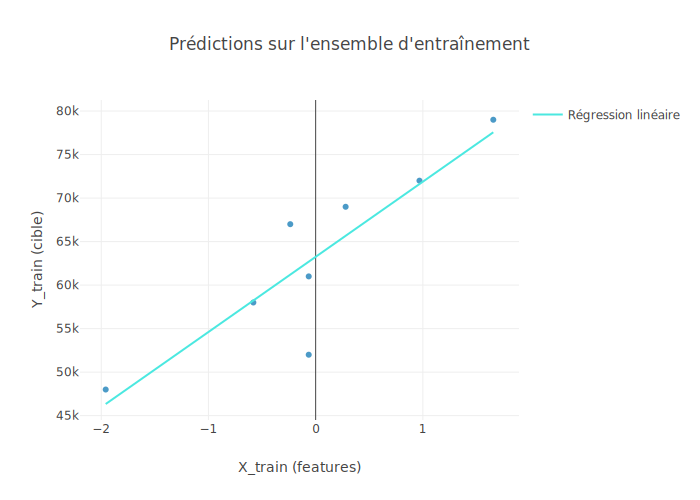

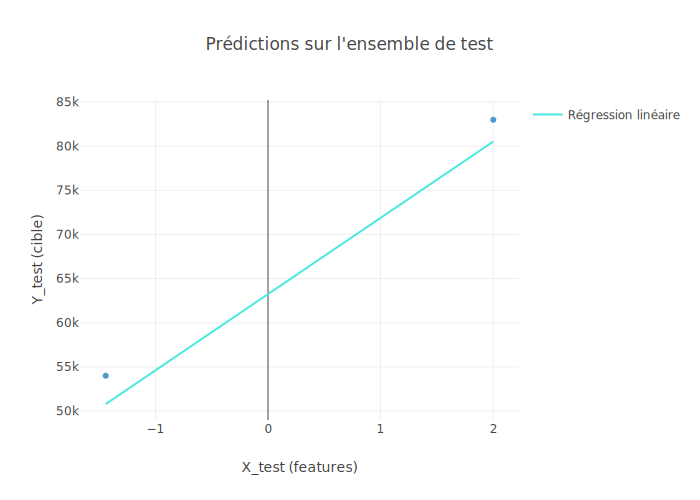

In [18]:
# Visualisation des prédictions sur l'ensemble d'entraînement
fig = px.scatter(x=X_train.flatten(), y=Y_train, title="Prédictions sur l'ensemble d'entraînement")
fig.add_trace(go.Scatter(x=X_train.flatten(), y=Y_train_pred, name="Régression linéaire", mode="lines"))
fig.update_layout(xaxis_title="X_train (features)", yaxis_title="Y_train (cible)")
fig.show()

# Visualisation des prédictions sur l'ensemble de test
fig = px.scatter(x=X_test.flatten(), y=Y_test, title="Prédictions sur l'ensemble de test")
fig.add_trace(go.Scatter(x=X_test.flatten(), y=Y_test_pred, name="Régression linéaire", mode="lines"))
fig.update_layout(xaxis_title="X_test (features)", yaxis_title="Y_test (cible)")
fig.show()

# Multivariate linear regression

In [20]:
# Séparation de la variable cible Y des features X
print("Séparation des labels des features...")
features_list = ["Country", "Age", "Purchased"]
target_variable = "Salary"

# Sélection des features et de la variable cible
X = dataset[features_list]
Y = dataset[target_variable]

print("...Fini.\n")

# Afficher les premières lignes de Y et X
print("Y (Variable cible - Salary) :")
print(Y.head(), "\n")

print("X (Features - Country, Age, Purchased) :")
print(X.head())

Séparation des labels des features...
...Fini.

Y (Variable cible - Salary) :
0    72000
1    48000
2    54000
3    61000
4    69000
Name: Salary, dtype: int64 

X (Features - Country, Age, Purchased) :
   Country   Age Purchased
0   France  44.0        No
1    Spain  27.0       Yes
2  Germany  30.0        No
3    Spain  38.0        No
4  Germany  40.0       Yes


In [21]:
# Détection automatique des colonnes numériques et catégoriques
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

# Affichage des résultats
print(f'Colonnes numériques détectées : {numeric_features}')
print(f'Colonnes catégoriques détectées : {categorical_features}')

Colonnes numériques détectées : ['Age']
Colonnes catégoriques détectées : ['Country', 'Purchased']


In [22]:
# Division du dataset en ensembles d'entraînement et de test
print("Division du dataset en ensembles d'entraînement et de test...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("...Fini.\n")

# Affichage des dimensions des ensembles
print(f"Dimensions de X_train : {X_train.shape}, Y_train : {Y_train.shape}")
print(f"Dimensions de X_test : {X_test.shape}, Y_test : {Y_test.shape}\n")

Division du dataset en ensembles d'entraînement et de test...
...Fini.

Dimensions de X_train : (8, 3), Y_train : (8,)
Dimensions de X_test : (2, 3), Y_test : (2,)



# Preprocessing

In [23]:
# Pipeline pour les features numériques
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Remplacer les valeurs manquantes par la moyenne des colonnes
    ('scaler', StandardScaler())  # Mise à l'échelle des données
])

print("Pipeline pour les features numériques créée avec succès.")

Pipeline pour les features numériques créée avec succès.


In [24]:
# Pipeline pour les features catégoriques
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))  # Encodage en One-Hot, ignorer les catégories inconnues
])

print("Pipeline pour les features catégoriques créée avec succès.")

Pipeline pour les features catégoriques créée avec succès.


In [25]:
# Créer un objet preprocessor qui décrit tous les traitements à appliquer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),  # Pipeline pour les variables numériques
        ('cat', categorical_transformer, categorical_features)  # Pipeline pour les variables catégoriques
    ]
)

print("Preprocessor créé avec succès.")

Preprocessor créé avec succès.


In [26]:
# Prétraitement sur l'ensemble d'entraînement
print("Prétraitement sur l'ensemble d'entraînement...")
print(X_train[:5])  # Affichage des premières lignes avant transformation
X_train = preprocessor.fit_transform(X_train)  # Appliquer fit + transform sur l'ensemble d'entraînement
print("...Fini !\n")
print("Premières lignes de X_train après prétraitement :")
print(X_train[:5], "\n")  # X_train est désormais un tableau NumPy

# Prétraitement sur l'ensemble de test
print("Prétraitement sur l'ensemble de test...")
print(X_test[:5])  # Affichage des premières lignes avant transformation
X_test = preprocessor.transform(X_test)  # Appliquer seulement transform sur l'ensemble de test
print("...Fini !\n")
print("Premières lignes de X_test après prétraitement :")
print(X_test[:5], "\n")  # X_test est désormais un tableau NumPy

Prétraitement sur l'ensemble d'entraînement...
   Country   Age Purchased
4  Germany  40.0       Yes
9   France  37.0       Yes
1    Spain  27.0       Yes
6    Spain   NaN        No
7   France  48.0       Yes
...Fini !

Premières lignes de X_train après prétraitement :
[[ 0.27063731  1.          0.          1.        ]
 [-0.24603392  0.          0.          1.        ]
 [-1.96827133  0.          1.          1.        ]
 [ 0.          0.          1.          0.        ]
 [ 1.64842723  0.          0.          1.        ]] 

Prétraitement sur l'ensemble de test...
   Country   Age Purchased
2  Germany  30.0        No
8  Germany  50.0        No
...Fini !

Premières lignes de X_test après prétraitement :
[[-1.4516001   1.          0.          0.        ]
 [ 1.99287472  1.          0.          0.        ]] 



# Train model

In [27]:
# Entraîner le modèle de régression linéaire
print("Entraînement du modèle de régression linéaire...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Fini !\n")

# Afficher les coefficients du modèle
print(f"Coefficients du modèle : {regressor.coef_}")
print(f"Ordonnée à l'origine (intercept) : {regressor.intercept_}\n")

Entraînement du modèle de régression linéaire...
...Fini !

Coefficients du modèle : [ 7504.95148781   432.38980745 -5467.54009813  3440.56405393]
Ordonnée à l'origine (intercept) : 63095.92627716159



# Performance assessment

In [28]:
# Prédictions sur l'ensemble d'entraînement
print("Prédictions sur l'ensemble d'entraînement...")
Y_train_pred = regressor.predict(X_train)
print("...Fini !\n")

# Affichage des 5 premières prédictions
print("Premières prédictions sur l'ensemble d'entraînement :")
print(Y_train_pred[:5], "\n")

# Optionnel : Comparaison avec les vraies valeurs
print("Premières vraies valeurs (Y_train) :")
print(Y_train[:5].values, "\n")

Prédictions sur l'ensemble d'entraînement...
...Fini !

Premières prédictions sur l'ensemble d'entraînement :
[69000.         64690.01772977 46297.16942234 57628.38617903
 78907.85675999] 

Premières vraies valeurs (Y_train) :
[69000 67000 48000 52000 79000] 



In [29]:
# Prédictions sur l'ensemble de test
print("Prédictions sur l'ensemble de test...")
Y_test_pred = regressor.predict(X_test)
print("...Fini !\n")

# Affichage des 5 premières prédictions
print("Premières prédictions sur l'ensemble de test :")
print(Y_test_pred[:5], "\n")

# Optionnel : Comparaison avec les vraies valeurs
print("Premières vraies valeurs (Y_test) :")
print(Y_test[:5].values, "\n")

Prédictions sur l'ensemble de test...
...Fini !

Premières prédictions sur l'ensemble de test :
[52634.12773677 78484.74415536] 

Premières vraies valeurs (Y_test) :
[54000 83000] 



In [30]:
# Affichage des scores R^2
print(f"R2 score sur l'ensemble d'entraînement : {r2_score(Y_train, Y_train_pred):.4f}")
print(f"R2 score sur l'ensemble de test : {r2_score(Y_test, Y_test_pred):.4f}\n")

R2 score sur l'ensemble d'entraînement : 0.9017
R2 score sur l'ensemble de test : 0.9471



# Interpreting the model's coefficients
As we've standardized our features, we can use the coefficients of the regression to estimate the importance of each feature for the prediction. The model's parameters are saved in a .coef_ attribute:

In [31]:
regressor.coef_

array([ 7504.95148781,   432.38980745, -5467.54009813,  3440.56405393])

Each coefficient can be linked with the name of the corresponding feature by digging into the different pipelines that were used to produce the final version of the X_train/X_test arrays:

In [32]:
# Récupération des noms des colonnes correspondant à chaque coefficient
column_names = []

for name, pipeline, features_list in preprocessor.transformers_:
    if name == 'num':
        features = features_list  # Noms des colonnes pour les variables numériques
    else:
        features = pipeline.named_steps['encoder'].get_feature_names_out(features_list)  # Noms des colonnes encodées
    
    column_names.extend(features)  # Ajouter les noms des colonnes à la liste

# Affichage des noms des colonnes
print("Noms des colonnes correspondant à chaque coefficient : ", column_names)

Noms des colonnes correspondant à chaque coefficient :  ['Age', 'Country_Germany', 'Country_Spain', 'Purchased_Yes']


In [33]:
# Créer un DataFrame des coefficients avec les noms des colonnes
coefs = pd.DataFrame(data=regressor.coef_.transpose(), index=column_names, columns=["coefficients"])

# Affichage du DataFrame
print(coefs)

                 coefficients
Age               7504.951488
Country_Germany    432.389807
Country_Spain    -5467.540098
Purchased_Yes     3440.564054


WARNING
Comparison in absolute values
The feature importance is related to the absolute values of the coefficients. Don't forget to compute the absolute value before concluding !

In [34]:
# Calculer la valeur absolue des coefficients et trier les features par importance
feature_importance = coefs.abs().sort_values(by='coefficients')

# Afficher le DataFrame trié par importance des features
print(feature_importance)

                 coefficients
Country_Germany    432.389807
Purchased_Yes     3440.564054
Country_Spain     5467.540098
Age               7504.951488


Importance relative et valeur absolue des coefficients :

Lorsque tu regardes les coefficients tels quels, tu obtiens une information sur la direction de l’impact d’une feature (positive ou négative). Cependant, si tu veux mesurer l’importance relative des features sans te soucier de la direction, tu prends la valeur absolue des coefficients. Cela te permet de classer les features uniquement en fonction de leur force d’impact sur la prédiction, qu’il soit positif ou négatif.

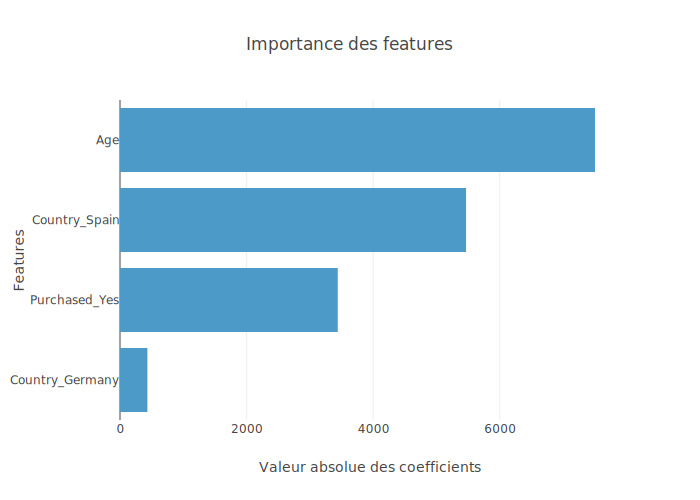

In [35]:
# Tracer les coefficients (importance des features)
fig = px.bar(feature_importance, orientation='h', title="Importance des features")

# Mettre à jour la mise en page pour éviter le recadrage des noms de colonnes
fig.update_layout(
    showlegend=False, 
    margin={'l': 120},  # Éviter que les noms des colonnes soient coupés
    xaxis_title="Valeur absolue des coefficients",
    yaxis_title="Features"
)

# Afficher le graphique
fig.show()